In [1]:
!pip install tweepy

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
auth = tweepy.OAuthHandler("7YWwchZ5FJSaSkUqGh1dcqRPd", "sMIrTG99VAu7IhpIE6GeNxAfVZrGJgUyv9QOr7lGzTvHUvV2Fv")
auth.set_access_token("1155160241358721024-M0Ps3SBjKSjMHjK5SJDbddxQsDMaao", "KguQcFIY4ESvTo285izomSI2eOpfuNJUKEpmO3Mni0F8r")
api = tweepy.API(auth, wait_on_rate_limit=True)

In [21]:
tweets = api.search(q="Udemy",count=200,lang="en",since="2020-11-01")
for item in tweets:
    print(item.text)

RT @machinelearnflx: Human Computer Interaction &amp; Machine Learning https://t.co/Fdk5Q8p6fy  #machinelearning #ad
Human Computer Interaction &amp; Machine Learning https://t.co/Fdk5Q8p6fy  #machinelearning #ad
RT @Bukmedianet1: Deep Learning and Computer Vision A-Z™: OpenCV, SSD &amp; GANs =&gt; https://t.co/2thaR65o7L
     
#ARTIFICIALINTELLIGENCE #Data…
RT @Bukmedianet1: Deep Learning and Computer Vision A-Z™: OpenCV, SSD &amp; GANs =&gt; https://t.co/2thaR65o7L
     
#ARTIFICIALINTELLIGENCE #Data…
RT @Bukmedianet1: Deep Learning and Computer Vision A-Z™: OpenCV, SSD &amp; GANs =&gt; https://t.co/2thaR65o7L
     
#ARTIFICIALINTELLIGENCE #Data…
RT @Bukmedianet1: Deep Learning and Computer Vision A-Z™: OpenCV, SSD &amp; GANs =&gt; https://t.co/2thaR65o7L
     
#ARTIFICIALINTELLIGENCE #Data…
RT @Bukmedianet1: Deep Learning and Computer Vision A-Z™: OpenCV, SSD &amp; GANs =&gt; https://t.co/2thaR65o7L
     
#ARTIFICIALINTELLIGENCE #Data…
RT @pythonbot_: Python And Django Framework For

In [19]:
df =pd.DataFrame([item.text for item in tweets], columns=['Tweets'])

In [22]:
#cleaning the data
def cleanTxt1(text):
    text = re.sub(r'@[A-za-z0-9]+', '', text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt1)
df

,Tweets
0,: Deep Learning and Computer Vision A-Z™: Open...
1,: Deep Learning and Computer Vision A-Z™: Open...
2,: Deep Learning and Computer Vision A-Z™: Open...
3,: Deep Learning and Computer Vision A-Z™: Open...
4,: Deep Learning and Computer Vision A-Z™: Open...
...,...
95,Plan Your Success. Vision and Goal Setting Sys...
96,: UDEMY ONLINE COURSES\nThe Complete Web Devel...
97,: Day 5 / 100DaysOfCode Python\nCreated a pass...
98,: Day 5 / 100DaysOfCode Python\nCreated a pass...


In [23]:
#Sujectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#Add subjectivity and poloarity to data frame 
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] =df['Tweets'].apply(getpolarity)
df

,Tweets,Subjectivity,Polarity
0,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0
1,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0
2,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0
3,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0
4,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0
...,...,...,...
95,Plan Your Success. Vision and Goal Setting Sys...,0.0,0.3
96,: UDEMY ONLINE COURSES\nThe Complete Web Devel...,0.4,0.1
97,: Day 5 / 100DaysOfCode Python\nCreated a pass...,0.0,0.0
98,: Day 5 / 100DaysOfCode Python\nCreated a pass...,0.0,0.0


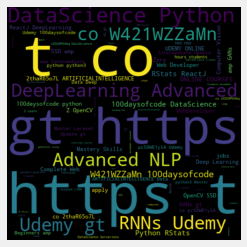

In [24]:
#Plotting WordCloud 
allwords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=500, random_state =21, max_font_size=200).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [25]:
#Positive, Negative, Neutral 
def getAnalysis(points):
    if points < 0:
        return 'Negative'
    elif points == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#Add analysis to the dataframe 
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0,Neutral
1,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0,Neutral
2,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0,Neutral
3,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0,Neutral
4,: Deep Learning and Computer Vision A-Z™: Open...,0.4,0.0,Neutral
...,...,...,...,...
95,Plan Your Success. Vision and Goal Setting Sys...,0.0,0.3,Positive
96,: UDEMY ONLINE COURSES\nThe Complete Web Devel...,0.4,0.1,Positive
97,: Day 5 / 100DaysOfCode Python\nCreated a pass...,0.0,0.0,Neutral
98,: Day 5 / 100DaysOfCode Python\nCreated a pass...,0.0,0.0,Neutral


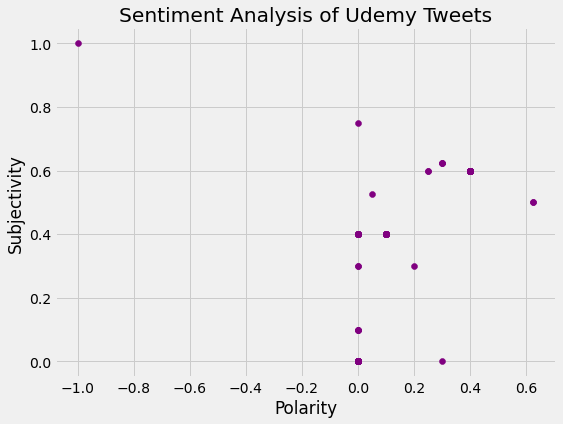

In [35]:
#Plot polarity against subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
    
plt.title('Sentiment Analysis of Udemy Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [28]:
#percentage of positive tweets 
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

51.0

In [29]:
#percentage of negative tweets 
ngtweets = df[df.Analysis == 'Negative']
ngtweets = ngtweets['Tweets']

round((ngtweets.shape[0] / df.shape[0]) * 100, 1)

1.0

In [30]:
#percentage of neutral tweets 
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

48.0

In [31]:
df['Analysis'].value_counts()

Positive    51
Neutral     48
Negative     1
Name: Analysis, dtype: int64

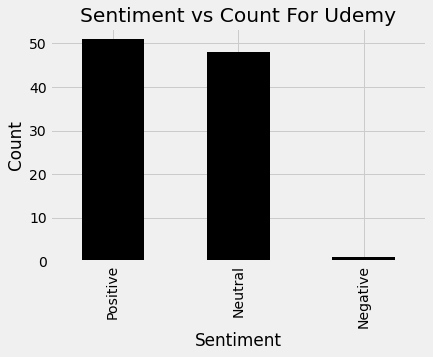

In [33]:
#Plotting the counts 
plt.title('Sentiment vs Count For Udemy')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar', color='Black')
plt.show()

In [37]:
df.to_csv(r'Udemy Tweets.csv', index=False)